~~  Vertical MiniDrama Database ~~
DSCI 510: Final Project

Follow the steps below to test run the program:

***** STEP 1: Configure database for testing *****

In [5]:
from config import *  # Configures directory for file mapping
from database import get_database  # Links the database file to the program

get_database()

## Expected Output:
# If running program first time, this will prompt you to create a new database file
# If database is already created, program will print filepath to database for confirmation

Using database file: /Users/ttlee/Desktop/dsci510_fall2025_final_project/db/verticals_database.db


'/Users/ttlee/Desktop/dsci510_fall2025_final_project/db/verticals_database.db'

***** STEP 2: Extract data and load into database  *****

DATA SOURCE 1: IMDB TITLES
** follow the steps below to load data from IMDB into the database **

SAMPLE INPUT FOR TESTING
Test #1
Actor: Jackson Tiller
IMDB URL: https://www.imdb.com/name/nm7055225

Test #2
Actor: Alexa Reddy
IMDB URL: https://www.imdb.com/name/nm5879789

Test #3
Actor: Luke Charles Stafford
IMDB URL: https://www.imdb.com/name/nm11276021


NOTE: The current scraper function will only load the latest 15 titles into the database. This is due to the IMDB page settings. For the purposes of this project, we've maxed out actor previous titles at 15.

In [ ]:
from package.imdb_scraper import imdb_title_scraper
from database import update_database_with_json


# Scrapes actor's IMDB page for latest credits and imports them into a JSON file
url = input("url: ")
actor_name = input("Actor name: ")
result = imdb_title_scraper(url, actor_name)   # function imdb_title_scraper returns the JSON file name as a string
## Expected output: "[number of titles] extracted for [actor] and saved to file: [filepath]"

# Load the raw JSON data into the database
json_file = result
db = get_database()
update_database_with_json(db, json_file, actor_name)
## Expected output: Tables 'Roles' and 'Actors' will be updated with raw data from JSON file



DATA SOURCE 2: INSTAGRAM FOLLOWER COUNT
** follow the steps below to extract actors Instagram follower count to load into database **

SAMPLE INPUT FOR TESTING
TEST #1
Actor name: Jackson Tiller
Username: jacksontiller__

TEST #2
Actor Name: Alexa Reddy
Username: alexareddy

TEST #3
Actor Name: Luke Charles Stafford
Username: lukecharlesstafford

In [ ]:
from package.count_followers import get_ig_followers
from database import add_content_to_db

# To test the function below, enter an Instagram username or use a sample one from above
username = input("Username: ")
get_ig_followers(username)

# Add follower count to database
followers = get_ig_followers(username)
add_content_to_db('Actors', 'number_followers', followers)


DATA SOURCE 3: YOUTUBE COMMENTS (API)
** follow the steps below to extract YouTube comments using YouTube API **

SAMPLE INPUT FOR TESTING
TEST #1
Show Title: 30 Years Frozen
Video ID: g_C8mLNx6pU

TEST #2
Show Title: I'm the Lady Boss
Video ID diCMzPGyFNg

TEST #3
Show Title: How to Land a Movie Star
Video ID: kvnGbuWtLMQ


In [ ]:
from package.youtube_scraper import scrape_comments, load_comments
from database import connect_api_key

# Connects API Key - You will need your own API key, see Readme for details
key_file = f"{KEYS_DIRECTORY}/youtube_key.txt"   # Please run config to properly connect file path
api_key = connect_api_key(key_file)

# Extracts comments from a YouTube video and saves them in a .csv file
video_id = input("  Video ID: ")
max_comments = 1000
load_comments(video_id, api_key, max_comments)   # Returns the csv file path
## Expected output: comments will be saved as .csv file under 'data/youtube_comments/{video_ID}_youtube_comments.csv


***** STEP 3: Visualize Data *****

Function: count_words(video_id, top_words)-> list:
Usage: Get top 'x' count of words from a csv file of extracted Youtube comments

Function: create_word_cloud(text):
Usage: Generate a word cloud from a body of text for user sentiment visualization

Function: analyze_actor_hit_rates, plot_all_hit_rates
Usage: Generate a bar graph of top actors by their hit-rates

In [ ]:
import pandas as pd
from database import count_words

# Get the top 'X' words from YouTube comments saved to csv file under filename '{video_id}_youtube_comments.csv'
video_id = input("  Video ID: ")   # You must run the data extraction from above to generate csv file before running this
top_words = 10
data = count_words(video_id, top_words)

# Generates data frame for top words visualization
df = pd.DataFrame(data)
df.columns = ['WORD', 'COUNT']

styled_df = df.style.set_properties(**{'text-align': 'left'}).hide(axis="index")
styled_df



In [ ]:
from package.youtube_scraper import scrape_comments
from package.wordcloud_generator import create_word_cloud
from database import connect_api_key, save_results_to_file

# Connects API Key - You will need your own API key, see Readme for details
key_file = f"{KEYS_DIRECTORY}/youtube_key.txt"   # Please run config to properly connect file path
api_key = connect_api_key(key_file)

# Gets max [1000] comments from [video_ID] to generate a word cloud
video_id = 'diCMzPGyFNg'
max_comments = 1000
comments = scrape_comments(video_id, api_key, max_comments)

# Converts the list into a string for word cloud generation
text = " ".join(comments)

wordcloud = create_word_cloud(text)

# Save visualized data to 'data' folder
save_results_to_file(wordcloud)

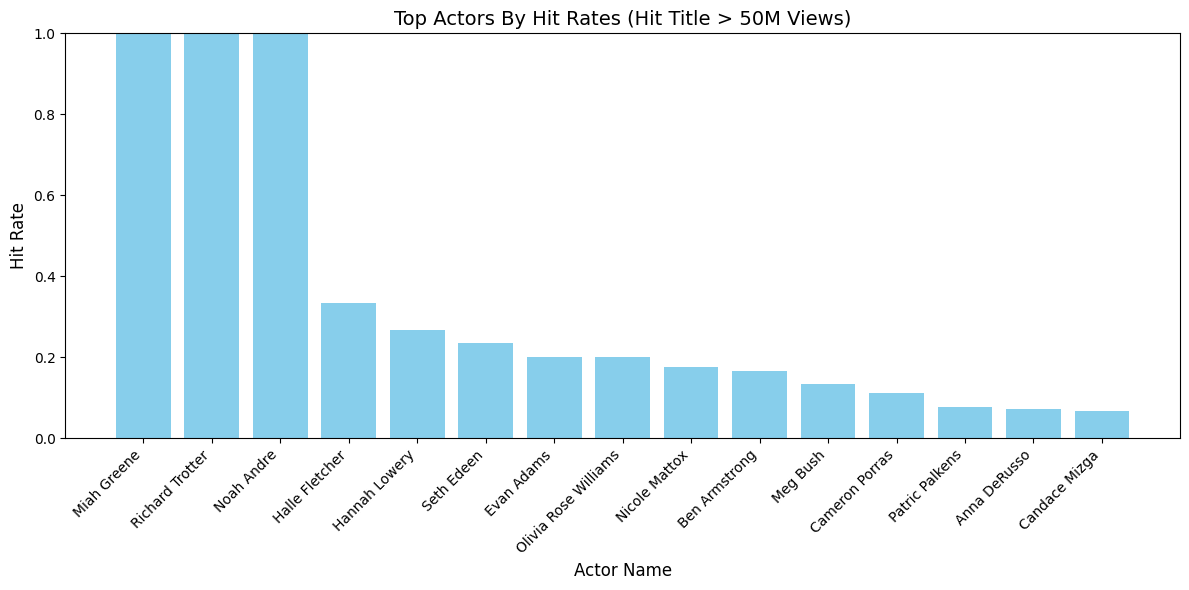

In [1]:
from database import analyze_actor_hit_rates, plot_all_hit_rates, db_filepath

# Creates a dataframe of top hit-making actors by their hit-rate
df = analyze_actor_hit_rates(db_filepath)

# Plots bar graph of top 15 actors by hit-rate
plot_all_hit_rates(df)



Processing query...
Correlation coefficient: 0.3481


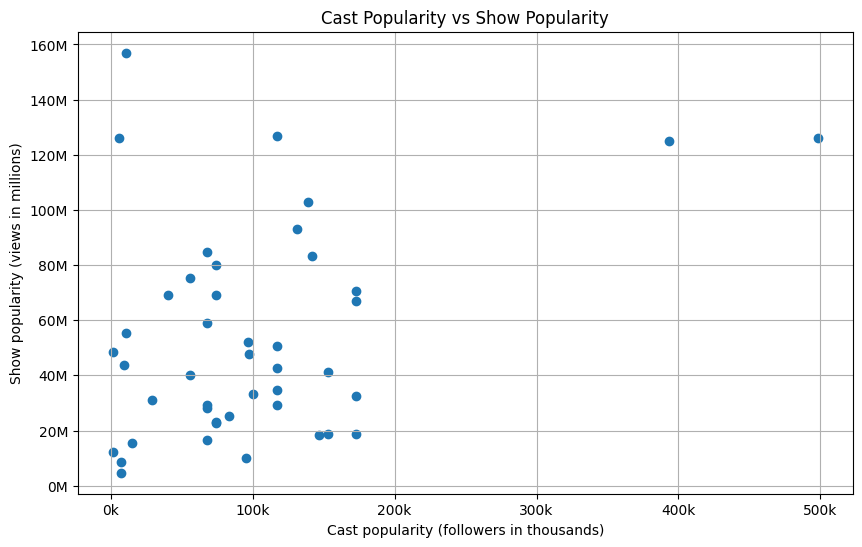

In [2]:
from database import compare_followers_vs_views, create_scatterplot, db_filepath

# Compares show titles and their overall views vs their top actor follower count
df = compare_followers_vs_views(db_filepath)

# Creates a scatterplot to visualize correlation
create_scatterplot(df)